In [1]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

Using TensorFlow backend.


In [2]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [3]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
print(X_train.shape)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])

(60000, 784)


In [4]:
import numpy as np
y_train = (np.arange(10) == y_train[:, None]).astype(int)  
y_test = (np.arange(10) == y_test[:, None]).astype(int)
print(y_train.shape)

(60000, 10)


In [5]:
print(y_test.shape)

(10000, 10)


In [6]:
X_test,X_val = X_test[:5000],X_test[5000:]
y_test,y_val = y_test[:5000], y_test[5000:]

In [7]:
print(X_test.shape)
print(X_val.shape)

(5000, 784)
(5000, 784)


In [8]:
print(X_train[0]) #用keras读取和用from tensorflow.examples.tutorials.mnist import input_data读取数据，读进来数据不一样，后者已经做了预处理，值在0-1之间。
#由于这个差别，如果使用relu激活函数，loss直接就爆炸了，而sigmoid不会。 若使用预处理，则relu就没有loss爆炸的问题。

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [9]:
# Normalize the data: subtract the mean image
# mean_image = np.mean(X_train, axis = 0)
# X_train -= mean_image
# X_val -= mean_image
# X_test -= mean_image
#减去均值后，还可以除以std。
#这样写有个不好，就是X_test没有与训练数据完全隔离。

#朴素写法，这种写法得到的数据应该就是和TensorFlow导入的一样的，只是数量不一样(猜测)。
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test /255

In [10]:
print(3/255)

0.011764705882352941


In [11]:
print(18/255)

0.07058823529411765


In [12]:
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

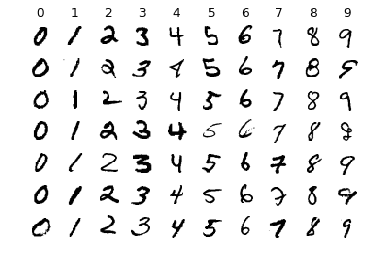

In [13]:
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = list(range(10))
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y == np.argmax(y_train, axis=1))#1代表行
    idxs = np.random.choice(idxs, samples_per_class, replace=False)#随机抽7张该类图片
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1#将同一类图片显示在同一列
        plt.subplot(samples_per_class, num_classes, plt_idx)
        image = X_train[idx].reshape((28, 28))
        plt.imshow(image, cmap = 'gray_r')
#         print(image)
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [14]:
import tensorflow as tf
# Create the model
x = tf.placeholder(tf.float32, [None, 784])
# W_1 = tf.Variable(tf.zeros([784, 128]))
#第一层
W_1 = tf.get_variable('W_1', [784, 64], initializer=tf.random_normal_initializer())
# b_1 = tf.Variable(tf.zeros([128]))
b_1 = tf.get_variable('b_1', [64], initializer=tf.random_normal_initializer())
a_1 = tf.matmul(x, W_1) + b_1
z_1 = tf.nn.relu(a_1)

#第二层
# W_2 = tf.Variable(tf.zeros([128, 10]))
W_2 = tf.get_variable('W_2', [64, 32], initializer=tf.random_normal_initializer())
# b_2 = tf.Variable(tf.zeros([10]))
b_2 = tf.get_variable('b_2', [32], initializer=tf.random_normal_initializer())
a_2 = tf.matmul(z_1, W_2) + b_2
z_2 = tf.nn.relu(a_2)

#第三层
# W_3 = tf.Variable(tf.zeros([64, 10]))
W_3 = tf.get_variable('W_3', [32, 10], initializer=tf.random_normal_initializer())
# b_3 = tf.Variable(tf.zeros([10]))
b_3 = tf.get_variable('b_3', [10], initializer=tf.random_normal_initializer())
a_3 = tf.matmul(z_2, W_3) + b_3
# z_3 = tf.nn.softmax(a_3)

In [15]:
# Define loss and optimizer
y = tf.placeholder(tf.float32, [None, 10])
#交叉熵
# loss = -tf.reduce_sum(y*tf.log(z_3))

#看来loss爆炸可能？不是出在数据预处理的问题，也不是隐藏层单元个数的问题（把64改成了100，把32改成了100，也出现了
#loss爆炸）而是出在loss计算上。（猜测）
#y:[None,10]
#z_3: [None,10]
#y*z_3:[None,10]
#如果用batch sgd，None就是batch_size
#reduce_sum相当于把整个矩阵求和了,初始时loss过大，导致爆炸。
# loss = -tf.reduce_sum(y*tf.log(z_3),1) #按行求和
# loss = tf.reduce_mean(loss)#求一个batch的平均。
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = a_3,labels = y))
train_step = tf.train.GradientDescentOptimizer(0.001).minimize(loss)#学习率从0.01降为0.001

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



http://www.tensorfly.cn/tfdoc/tutorials/mnist_beginners.html,
注意这个教程里用了reduce_sum，把所有batch里的样本的交叉熵都加起来算作loss，这导致用relu的时候爆炸了，但我在reduce_sum
后又跟了reduce_mean,且尝试了batch_size = 1，loss仍然爆炸。但是如果用softmax_cross_entropy_with_logits则能正常训练！

Epoch 0 training loss: 22.86894696823821, test acc: 0.5182
Epoch 1 training loss: 4.3844886610884135, test acc: 0.4888
Epoch 2 training loss: 2.3240100305154145, test acc: 0.4626
Epoch 3 training loss: 1.8725780144429134, test acc: 0.4728
Epoch 4 training loss: 1.665342866866065, test acc: 0.5068
Epoch 5 training loss: 1.58178570167596, test acc: 0.5214
Epoch 6 training loss: 1.4736157968354375, test acc: 0.5172
Epoch 7 training loss: 1.3942996276848372, test acc: 0.5432
Epoch 8 training loss: 1.3256082300628953, test acc: 0.5684
Epoch 9 training loss: 1.2799664625862264, test acc: 0.5736
Epoch 10 training loss: 1.2148879235868484, test acc: 0.5912
Epoch 11 training loss: 1.187210473853515, test acc: 0.5868
Epoch 12 training loss: 1.1675400958259463, test acc: 0.6102
Epoch 13 training loss: 1.119858354409492, test acc: 0.6312
Epoch 14 training loss: 1.0951457340707158, test acc: 0.6332
Epoch 15 training loss: 1.0689532605252023, test acc: 0.6298
Epoch 16 training loss: 1.03292604172026

Epoch 135 training loss: 0.5023073703805204, test acc: 0.8198
Epoch 136 training loss: 0.4849598921779817, test acc: 0.8234
Epoch 137 training loss: 0.4999007358789644, test acc: 0.8312
Epoch 138 training loss: 0.4826383166340807, test acc: 0.8184
Epoch 139 training loss: 0.49104802211972914, test acc: 0.8166
Epoch 140 training loss: 0.4861505217413339, test acc: 0.8216
Epoch 141 training loss: 0.48195210342277567, test acc: 0.8168
Epoch 142 training loss: 0.4836695903042427, test acc: 0.8276
Epoch 143 training loss: 0.48720752828712727, test acc: 0.827
Epoch 144 training loss: 0.4818381747600246, test acc: 0.8216
Epoch 145 training loss: 0.49194446813338993, test acc: 0.8176
Epoch 146 training loss: 0.47760137900916616, test acc: 0.827
Epoch 147 training loss: 0.48775383030602487, test acc: 0.8108
Epoch 148 training loss: 0.47752950346863726, test acc: 0.8104
Epoch 149 training loss: 0.47939886015726596, test acc: 0.8286
plot...


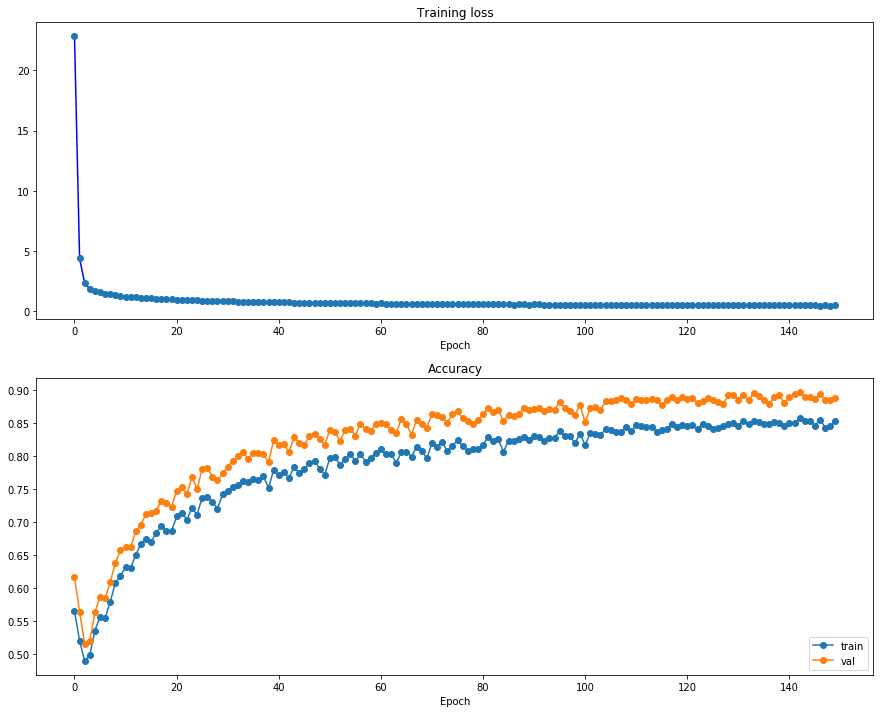

Test some samples


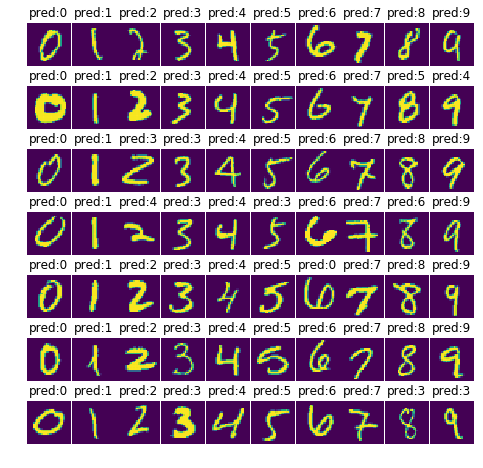

In [16]:
correct_prediction = tf.equal(tf.argmax(a_3, 1), tf.argmax(y, 1)) #(num_training,1),预测正确为1，反之为0
accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) # tf.int32 注意tf.int32会导致，acc算出来一直为0，reduce_mean可能要求输入为浮点数
init_op = tf.global_variables_initializer()

import matplotlib.gridspec as gridspec

# Train
batch_size = 32
num_epoch = 150
with tf.Session() as sess:
    sess.run(init_op)
    num_train = X_train.shape[0]
    num_batch = int(num_train/batch_size) + 1
    loss_history = []
    val_acc_history = []
    train_acc_history = []
    for epoch in range(num_epoch):
        avg_cost = 0
        for batch_idx in range(num_batch):
            batch_mask = np.random.choice(num_train,batch_size)
            X_batch = X_train[batch_mask]
            y_batch = y_train[batch_mask]
            _, c = sess.run([train_step,loss], feed_dict={x: X_batch, y: y_batch})
            avg_cost += c / num_batch
            
        loss_history.append(avg_cost)
        acc = sess.run(accuracy_op,feed_dict={x: X_train,y: y_train})
        train_acc_history.append(acc)
        acc = sess.run(accuracy_op,feed_dict={x: X_val,y: y_val})
        val_acc_history.append(acc)
        #evaluate
        acc = sess.run(accuracy_op,feed_dict={x: X_test,y: y_test})
        print("Epoch %s training loss: %s, test acc: %s" % (epoch, avg_cost,acc))
    
    print('plot...')
    # Run this cell to visualize training loss and train / val accuracy
    plt.figure(figsize=(9,9))
    plt.subplot(2, 1, 1)
    plt.plot(list(range(num_epoch)),loss_history,'b')#bo为点图，b为线图    
    plt.title('Training loss')
    plt.plot(loss_history, 'o')
    plt.xlabel('Epoch')

    plt.subplot(2, 1, 2)
    plt.title('Accuracy')
    plt.plot(train_acc_history, '-o', label='train')
    plt.plot(val_acc_history, '-o', label='val')
#     plt.plot([0.5] * len(val_acc_history), 'k--')
    plt.xlabel('Epoch')
    plt.legend(loc='lower right')
    plt.gcf().set_size_inches(15, 12)
    plt.show()
    
    print('Test some samples')
    fig = plt.figure(figsize=(8,8))
    gs = gridspec.GridSpec(7, 10)
    gs.update(wspace=0.035, hspace=0.1)  # set the spacing between axes.
    for y_, cls in enumerate(classes):
        idxs = np.flatnonzero(y_ == np.argmax(y_test, axis=1))#1代表行
        idxs = np.random.choice(idxs, samples_per_class, replace=False)#随机抽7张该类图片
        for i, idx in enumerate(idxs):
            plt_idx = i * num_classes + y_ 
            ax = plt.subplot(gs[plt_idx])
            ax.axis('off')
            plt.imshow(X_test[idx].reshape((28, 28)))
            pred = sess.run(a_3,feed_dict = {x:np.array([X_test[idx]])}) #返回的是numpy.ndarray
            pred = np.argmax(pred,axis = 1)[0]
            plt.title('pred:' + str(pred))
    plt.show()

In [ ]:
# Train
batch_size = 32
num_epoch = 150
with tf.Session() as sess:
    sess.run(init_op)
    num_train = X_train.shape[0]
    num_batch = int(num_train/batch_size) + 1
    loss_history = []
    val_acc_history = []
    train_acc_history = []
    for epoch in range(num_epoch):
        avg_cost = 0
        for batch_idx in range(num_batch):
            batch_mask = np.random.choice(num_train,batch_size)
            X_batch = X_train[batch_mask]
            y_batch = y_train[batch_mask]
            _, c = sess.run([train_step,loss], feed_dict={x: X_batch, y: y_batch})
            avg_cost += c / num_batch
            
        loss_history.append(avg_cost)
        acc = sess.run(accuracy_op,feed_dict={x: X_train,y: y_train})
        train_acc_history.append(acc)
        acc = sess.run(accuracy_op,feed_dict={x: X_val,y: y_val})
        val_acc_history.append(acc)
        #evaluate
        acc = sess.run(accuracy_op,feed_dict={x: X_test,y: y_test})
        print("Epoch %s training loss: %s, test acc: %s" % (epoch, avg_cost,acc))
    
    print('plot...')
    # Run this cell to visualize training loss and train / val accuracy
    plt.figure(figsize=(9,9))
    plt.subplot(2, 1, 1)
    plt.plot(list(range(num_epoch)),loss_history,'b')#bo为点图，b为线图    
    plt.title('Training loss')
    plt.plot(loss_history, 'o')
    plt.xlabel('Epoch')

    plt.subplot(2, 1, 2)
    plt.title('Accuracy')
    plt.plot(train_acc_history, '-o', label='train')
    plt.plot(val_acc_history, '-o', label='val')
#     plt.plot([0.5] * len(val_acc_history), 'k--')
    plt.xlabel('Epoch')
    plt.legend(loc='lower right')
    plt.gcf().set_size_inches(15, 12)
    plt.show()
    
    print('Test some samples')
    fig = plt.figure(figsize=(8,8))
    gs = gridspec.GridSpec(7, 10)
    gs.update(wspace=0.035, hspace=0.1)  # set the spacing between axes.
    for y_, cls in enumerate(classes):
        idxs = np.flatnonzero(y_ == np.argmax(y_test, axis=1))#1代表行
        idxs = np.random.choice(idxs, samples_per_class, replace=False)#随机抽7张该类图片
        for i, idx in enumerate(idxs):
            plt_idx = i * num_classes + y_ 
            ax = plt.subplot(gs[plt_idx])
            ax.axis('off')
            plt.imshow(X_test[idx].reshape((28, 28)))
            pred = sess.run(a_3,feed_dict = {x:np.array([X_test[idx]])}) #返回的是numpy.ndarray
            pred = np.argmax(pred,axis = 1)[0]
            plt.title('pred:' + str(pred))
    plt.show()

plot...


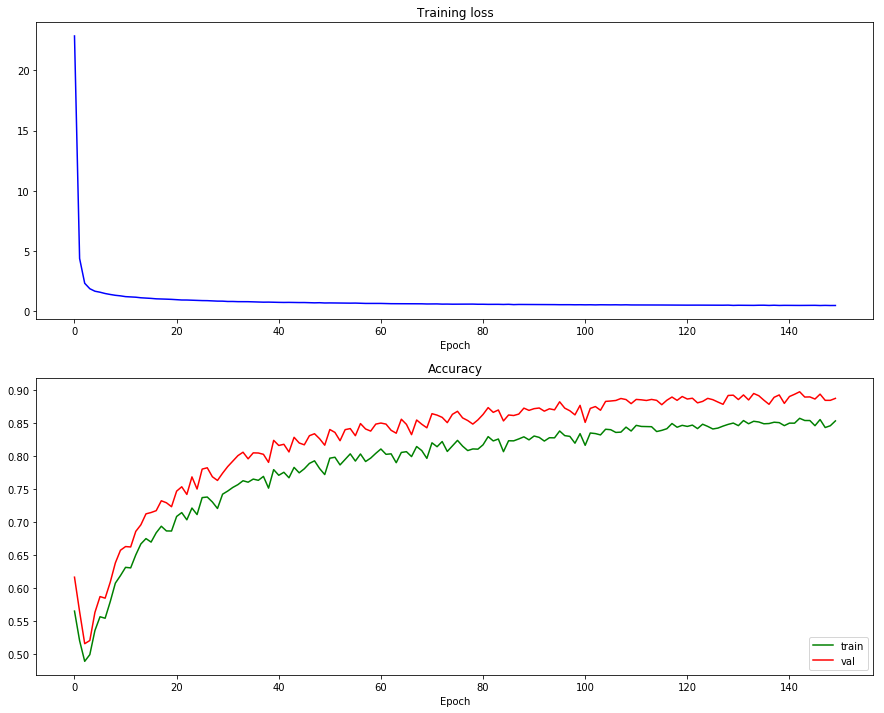

In [17]:
print('plot...')
# Run this cell to visualize training loss and train / val accuracy
plt.figure(figsize=(9,9))
plt.subplot(2, 1, 1)
# plt.plot(list(range(num_epoch)),loss_history,'b')#bo为点图，b为线图    
plt.title('Training loss')
plt.plot(loss_history, 'b')
plt.xlabel('Epoch')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(train_acc_history, 'g', label='train')
plt.plot(val_acc_history, 'r', label='val')
#     plt.plot([0.5] * len(val_acc_history), 'k--')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()